In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# Normalize + Flatten
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [4]:
x_train = x_train.reshape((len(x_train), 784))
x_test  = x_test.reshape((len(x_test), 784))

In [5]:
# Train only on digit '3' (normal class)
train_normal = x_train[y_train == 3]
test_normal = x_test[y_test == 3]

In [6]:
# build autoencoder

# Encoder converts input to latent representation
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)     # latent size 32

In [7]:
# d) Decoder converts latent rep. back to original input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [8]:
# autoencoder model
autoencoder = Model(input_img, decoded)

In [9]:
# e) Compile model with Optimizer, Loss & Metrics
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
autoencoder.fit(train_normal, train_normal,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(test_normal,test_normal))

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3836 - val_loss: 0.1086
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1108 - val_loss: 0.1070
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1104 - val_loss: 0.1066
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1095 - val_loss: 0.1058
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1085 - val_loss: 0.1024
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1044 - val_loss: 0.0993
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1013 - val_loss: 0.0961
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0984 - val_loss: 0.0943
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0964 - val_loss: 0.0913
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0937 - val_loss: 0.0892
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0917 - val_loss: 0.0876
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0904 - val_l

In [11]:
# ---- Anomaly Detection ----
normal_test = x_test[y_test==3]
anomaly_test = x_test[y_test==7]

In [12]:
test_data = np.concatenate([normal_test[:100], anomaly_test[:100]])
test_labels = np.array([0]*100 + [1]*100)


In [13]:
# reconstruction
recon = autoencoder.predict(test_data)
errors = np.mean(np.abs(test_data - recon),axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [14]:
# threshold
threshold = np.mean(errors[test_labels==0]) + 2*np.std(errors[test_labels==0])
print("Threshold =", threshold)
print("Anomalies Detected =", np.sum(errors > threshold))
print("Total Samples =", len(test_data))

Threshold = 0.12899215891957283
Anomalies Detected = 17
Total Samples = 200


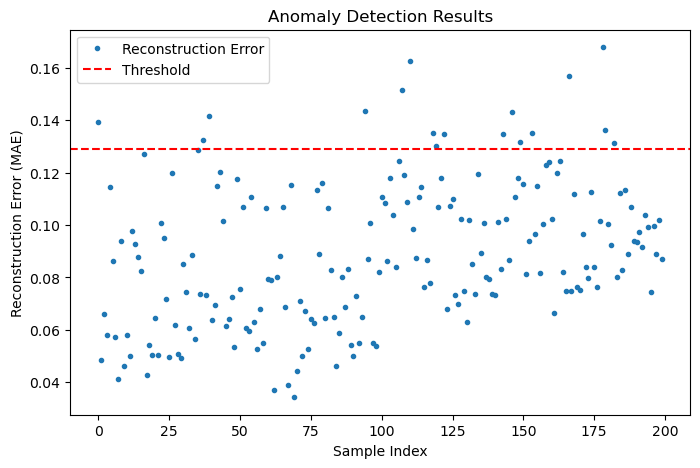

In [16]:
# ---- Optional: Point Graph Showing Each Sample vs Threshold ----
plt.figure(figsize=(8,5))
plt.plot(errors, marker='o', linestyle='', markersize=3, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MAE)")
plt.title("Anomaly Detection Results")
plt.legend()
plt.show()